In [1]:
from qiskit import*


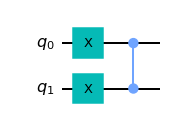

In [2]:
oracle = QuantumCircuit(2,name ='oracle')
oracle.x([0,1])#x gate for 11 search and y or z gate for 00 search when amplifier has z gates,viceversa when amplifier has y gates
oracle.cz(0,1)
#oracle.h([0,1])
oracle.to_gate()
oracle.draw()

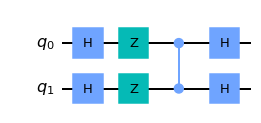

In [3]:
diffuser = QuantumCircuit(2, name = 'diffuser')

diffuser.h([0,1])
#diffuser.y([0,1])
diffuser.z(0)
diffuser.z(1)
diffuser.cz(0,1)
diffuser.h([0,1])

diffuser.to_gate()

diffuser.draw()

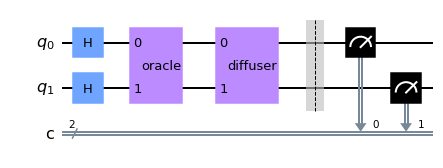

In [4]:
qc = QuantumCircuit(2,2)
qc.h([0,1]) #Quantum Circuit with domain

qc.append(oracle, [0,1])
qc.append(diffuser, [0,1])

qc.barrier()

qc.measure([0,1],[0,1])

qc.draw()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


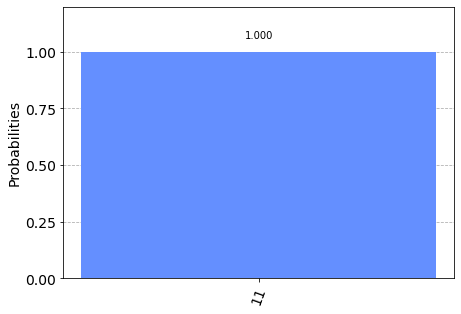

In [5]:
from qiskit.tools.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend,shots = 1024).result()
plot_histogram(result.get_counts(qc))